In [1]:
import numpy as np
import pandas as pd
from lmfit import Model
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
import scipy
import math
import scipy.integrate as integrate
import scipy.special as special

In [2]:
#names of colums from data
names=['x [mm]','y [mm]','z [mm]','Px [MeV/c]','Py [MeV/c]','Pz[MeV/c]','t [ns]','PDGid [/]','EventID [/]','TrackID [/]','ParentID [/]','Weight[/]']

In [3]:
#reading the data
file = r"C:\Users\Stefan\Documents\Masterarbeit\G4Beamline\BL1U\VDQ5.txt"

In [4]:
#Data after Quadrupole5
DataFrame = pd.read_csv(file, header=None, sep=' ', comment='#', names=names)
DataFrame_dtype = 'float'
n = 100 #number of events
DataFrame

x [mm]    y [mm]  z [mm]  Px [MeV/c]  Py [MeV/c]  Pz[MeV/c]   t [ns]  \
0     -4.24241  1.451600  8097.4   -2.066280   -0.408870    1063.01  36.0578   
1      4.34936 -1.938410  8097.4    2.040740    0.327137    1062.49  36.0595   
2      1.01416  0.453854  8097.4    0.677001    0.032814    1063.12  36.0532   
3      4.08860  1.176500  8097.4    1.977710   -0.549828    1063.31  36.0475   
4     -3.36407 -0.635202  8097.4   -1.775200   -0.161211    1064.34  36.0374   
...        ...       ...     ...         ...         ...        ...      ...   
99995  4.75876  0.726791  8097.4    2.247860   -0.018802    1062.60  36.0575   
99996  2.58376 -0.287722  8097.4    1.219570    0.094181    1062.79  36.0561   
99997 -3.97124 -4.512630  8097.4   -2.051290    1.384400    1062.74  36.0616   
99998 -3.88577 -2.907560  8097.4   -1.911930    0.804641    1063.88  36.0448   
99999 -4.31794  0.037754  8097.4   -2.137950    0.113654    1063.26  36.0541   

       PDGid [/]  EventID [/]  TrackID [/]  ParentID [/]  Weight[/]  
0           2212            1            1             0          1  
1           2212            2            1             0          1  
2           2212            3            1             0          1  
3           2212            4            1             0          1  
4           2212            5            1             0          1  
...          ...          ...          ...           ...        ...  
99995       2212        99996            1             0          1  
99996       2212        99997            1             0          1  
99997       2212        99998            1             0          1  
99998       2212        99999            1             0          1  
99999       2212       100000            1             0          1  

[100000 rows x 12 columns]

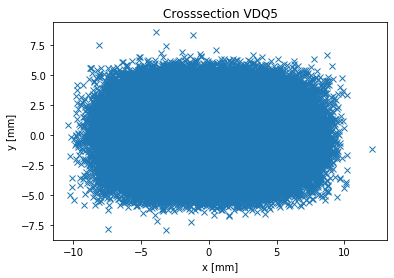

In [5]:
# plot of the cross-section of incidence
plt.figure(1) 
plt.plot(DataFrame['x [mm]'],DataFrame['y [mm]'],'x') 
plt.title('Beam profile Q5')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-60, 60)
plt.ylim(-50, 50)
plt.xlabel('x [mm]', fontsize=15)
plt.ylabel('y [mm]', fontsize=15)
plt.savefig("C:\\Users\\Stefan\\Documents\\Masterarbeit\\G4Beamline\\BL1U\\BeamProfiles\\{0}-BeamProfile.png".format(DataFrame['z [mm]'][1]), bbox_inches = "tight")
plt.show()

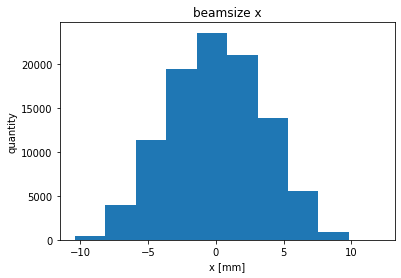

In [6]:
# plot of the beamsize x
plt.figure(2) 
plt.hist(DataFrame['x [mm]']) 
plt.title('beamsize x') 
plt.xlabel('x [mm]') 
plt.ylabel('quantity') 
plt.show()

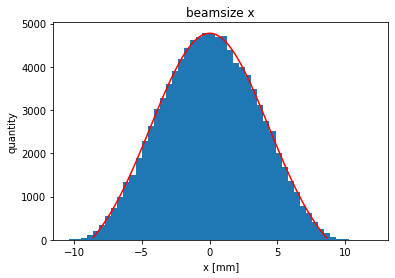

In [7]:
#Fitting of the histogram

#Define Fitting Function 
def FitFunction(x, A, mu, sig, Bkg):
    Gauss = A * np.exp(-(x-mu)**2/(2.*sig*sig)) + Bkg
    return Gauss

#number of points in each bin
numberInBin_x = np.histogram(DataFrame['x [mm]'], bins = 50)
numberInBin2_x = numberInBin_x[0]

#duplicate numbers to become the same amount of values as for the x sizes
numberInBin3_x0 =np.repeat(numberInBin2_x[0], numberInBin2_x[0])
numberInBin3_x0 = numberInBin3_x0.astype('int')
numberInBin3_x1 =np.repeat(numberInBin2_x[1], numberInBin2_x[1])
numberInBin3_x1 = numberInBin3_x1.astype('int')
numberInBin3_x2 =np.repeat(numberInBin2_x[2], numberInBin2_x[2])
numberInBin3_x2 = numberInBin3_x2.astype('int')
numberInBin3_x3 =np.repeat(numberInBin2_x[3], numberInBin2_x[3])
numberInBin3_x3 = numberInBin3_x3.astype('int')
numberInBin3_x4 =np.repeat(numberInBin2_x[4], numberInBin2_x[4])
numberInBin3_x4 = numberInBin3_x4.astype('int')
numberInBin3_x5 =np.repeat(numberInBin2_x[5], numberInBin2_x[5])
numberInBin3_x5 = numberInBin3_x5.astype('int')
numberInBin3_x6 =np.repeat(numberInBin2_x[6], numberInBin2_x[6])
numberInBin3_x6 = numberInBin3_x6.astype('int')
numberInBin3_x7 =np.repeat(numberInBin2_x[7], numberInBin2_x[7])
numberInBin3_x7 = numberInBin3_x7.astype('int')
numberInBin3_x8 =np.repeat(numberInBin2_x[8], numberInBin2_x[8])
numberInBin3_x8 = numberInBin3_x8.astype('int')
numberInBin3_x9 =np.repeat(numberInBin2_x[9], numberInBin2_x[9])
numberInBin3_x9 = numberInBin3_x9.astype('int')
numberInBin3_x10 =np.repeat(numberInBin2_x[10], numberInBin2_x[10])
numberInBin3_x10 = numberInBin3_x10.astype('int')
numberInBin3_x11 =np.repeat(numberInBin2_x[11], numberInBin2_x[11])
numberInBin3_x11 = numberInBin3_x11.astype('int')
numberInBin3_x12 =np.repeat(numberInBin2_x[12], numberInBin2_x[12])
numberInBin3_x12 = numberInBin3_x12.astype('int')
numberInBin3_x13 =np.repeat(numberInBin2_x[13], numberInBin2_x[13])
numberInBin3_x13 = numberInBin3_x13.astype('int')
numberInBin3_x14 =np.repeat(numberInBin2_x[14], numberInBin2_x[14])
numberInBin3_x14 = numberInBin3_x14.astype('int')
numberInBin3_x15 =np.repeat(numberInBin2_x[15], numberInBin2_x[15])
numberInBin3_x15 = numberInBin3_x15.astype('int')
numberInBin3_x16 =np.repeat(numberInBin2_x[16], numberInBin2_x[16])
numberInBin3_x16 = numberInBin3_x16.astype('int')
numberInBin3_x17 =np.repeat(numberInBin2_x[17], numberInBin2_x[17])
numberInBin3_x17 = numberInBin3_x17.astype('int')
numberInBin3_x18 =np.repeat(numberInBin2_x[18], numberInBin2_x[18])
numberInBin3_x18 = numberInBin3_x18.astype('int')
numberInBin3_x19 =np.repeat(numberInBin2_x[19], numberInBin2_x[19])
numberInBin3_x19 = numberInBin3_x19.astype('int')
numberInBin3_x20 =np.repeat(numberInBin2_x[20], numberInBin2_x[20])
numberInBin3_x20 = numberInBin3_x20.astype('int')
numberInBin3_x21 =np.repeat(numberInBin2_x[21], numberInBin2_x[21])
numberInBin3_x21 = numberInBin3_x21.astype('int')
numberInBin3_x22 =np.repeat(numberInBin2_x[22], numberInBin2_x[22])
numberInBin3_x22 = numberInBin3_x22.astype('int')
numberInBin3_x23 =np.repeat(numberInBin2_x[23], numberInBin2_x[23])
numberInBin3_x23 = numberInBin3_x23.astype('int')
numberInBin3_x24 =np.repeat(numberInBin2_x[24], numberInBin2_x[24])
numberInBin3_x24 = numberInBin3_x24.astype('int')
numberInBin3_x25 =np.repeat(numberInBin2_x[25], numberInBin2_x[25])
numberInBin3_x25 = numberInBin3_x25.astype('int')
numberInBin3_x26 =np.repeat(numberInBin2_x[26], numberInBin2_x[26])
numberInBin3_x26 = numberInBin3_x26.astype('int')
numberInBin3_x27 =np.repeat(numberInBin2_x[27], numberInBin2_x[27])
numberInBin3_x27 = numberInBin3_x27.astype('int')
numberInBin3_x28 =np.repeat(numberInBin2_x[28], numberInBin2_x[28])
numberInBin3_x28 = numberInBin3_x28.astype('int')
numberInBin3_x29 =np.repeat(numberInBin2_x[29], numberInBin2_x[29])
numberInBin3_x29 = numberInBin3_x29.astype('int')
numberInBin3_x30 =np.repeat(numberInBin2_x[30], numberInBin2_x[30])
numberInBin3_x30 = numberInBin3_x30.astype('int')
numberInBin3_x31 =np.repeat(numberInBin2_x[31], numberInBin2_x[31])
numberInBin3_x31 = numberInBin3_x31.astype('int')
numberInBin3_x32 =np.repeat(numberInBin2_x[32], numberInBin2_x[32])
numberInBin3_x32 = numberInBin3_x32.astype('int')
numberInBin3_x33 =np.repeat(numberInBin2_x[33], numberInBin2_x[33])
numberInBin3_x33 = numberInBin3_x33.astype('int')
numberInBin3_x34 =np.repeat(numberInBin2_x[34], numberInBin2_x[34])
numberInBin3_x34 = numberInBin3_x34.astype('int')
numberInBin3_x35 =np.repeat(numberInBin2_x[35], numberInBin2_x[35])
numberInBin3_x35 = numberInBin3_x35.astype('int')
numberInBin3_x36 =np.repeat(numberInBin2_x[36], numberInBin2_x[36])
numberInBin3_x36 = numberInBin3_x36.astype('int')
numberInBin3_x37 =np.repeat(numberInBin2_x[37], numberInBin2_x[37])
numberInBin3_x37 = numberInBin3_x37.astype('int')
numberInBin3_x38 =np.repeat(numberInBin2_x[38], numberInBin2_x[38])
numberInBin3_x38 = numberInBin3_x38.astype('int')
numberInBin3_x39 =np.repeat(numberInBin2_x[39], numberInBin2_x[39])
numberInBin3_x39 = numberInBin3_x39.astype('int')
numberInBin3_x40 =np.repeat(numberInBin2_x[40], numberInBin2_x[40])
numberInBin3_x40 = numberInBin3_x40.astype('int')
numberInBin3_x41 =np.repeat(numberInBin2_x[41], numberInBin2_x[41])
numberInBin3_x41 = numberInBin3_x41.astype('int')
numberInBin3_x42 =np.repeat(numberInBin2_x[42], numberInBin2_x[42])
numberInBin3_x42 = numberInBin3_x42.astype('int')
numberInBin3_x43 =np.repeat(numberInBin2_x[43], numberInBin2_x[43])
numberInBin3_x43 = numberInBin3_x43.astype('int')
numberInBin3_x44 =np.repeat(numberInBin2_x[44], numberInBin2_x[44])
numberInBin3_x44 = numberInBin3_x44.astype('int')
numberInBin3_x45 =np.repeat(numberInBin2_x[45], numberInBin2_x[45])
numberInBin3_x45 = numberInBin3_x45.astype('int')
numberInBin3_x46 =np.repeat(numberInBin2_x[46], numberInBin2_x[46])
numberInBin3_x46 = numberInBin3_x46.astype('int')
numberInBin3_x47 =np.repeat(numberInBin2_x[47], numberInBin2_x[47])
numberInBin3_x47 = numberInBin3_x47.astype('int')
numberInBin3_x48 =np.repeat(numberInBin2_x[48], numberInBin2_x[48])
numberInBin3_x48 = numberInBin3_x48.astype('int')
numberInBin3_x49 =np.repeat(numberInBin2_x[49], numberInBin2_x[49])
numberInBin3_x49 = numberInBin3_x49.astype('int')
numberInBin3_x = np.concatenate([numberInBin3_x0, numberInBin3_x1, numberInBin3_x2, numberInBin3_x3, numberInBin3_x4 ,numberInBin3_x5 ,numberInBin3_x6 ,numberInBin3_x7 , numberInBin3_x8 ,numberInBin3_x9,numberInBin3_x10, numberInBin3_x11, numberInBin3_x12, numberInBin3_x13, numberInBin3_x14 ,numberInBin3_x15 ,numberInBin3_x16 ,numberInBin3_x17 , numberInBin3_x18 ,numberInBin3_x19,numberInBin3_x20, numberInBin3_x21, numberInBin3_x22, numberInBin3_x23, numberInBin3_x24 ,numberInBin3_x25 ,numberInBin3_x26 ,numberInBin3_x27 , numberInBin3_x28 ,numberInBin3_x29,numberInBin3_x30, numberInBin3_x31, numberInBin3_x32, numberInBin3_x33, numberInBin3_x34 ,numberInBin3_x35 ,numberInBin3_x36 ,numberInBin3_x37 , numberInBin3_x38 ,numberInBin3_x39,numberInBin3_x40, numberInBin3_x41, numberInBin3_x42, numberInBin3_x43, numberInBin3_x44 ,numberInBin3_x45 ,numberInBin3_x46 ,numberInBin3_x47 , numberInBin3_x48 ,numberInBin3_x49])
numberInBin3_x

#actual fit
priors_x = [1, 0, 2, 1]
popt_x, pcov_x = curve_fit(FitFunction,np.sort(DataFrame['x [mm]']), numberInBin3_x, priors_x, maxfev=10000)

#definition of sigma2_x
sigma_x = popt_x[2]
sigma2_x = sigma_x *2

#define points for a smoth fit line
xspace = np.linspace(np.amin(DataFrame['x [mm]']), np.amax(DataFrame['x [mm]']), 100)

#limitation of the plot area (only where quantitiy>0)
#search for y-transition from negative to positive, to plot only positive curve
posCurve = np.where(FitFunction(xspace, *popt_x)>0)
xspace2 = np.linspace(xspace[posCurve[0][0]], xspace[posCurve[0][len(posCurve[0])-1]], 100)

# plot of the beamsize x
plt.figure(2) 
plt.hist(DataFrame['x [mm]'], bins = 50)  
plt.plot(xspace2,FitFunction(xspace2, *popt_x),'r-')
plt.title('beamsize x') 
plt.xlabel('x [mm]') 
plt.ylabel('quantity') 
plt.show()

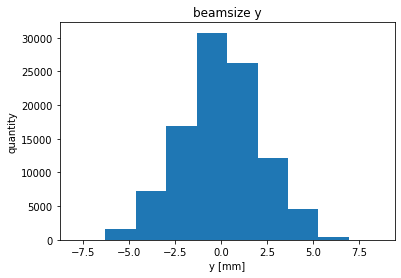

In [8]:
# plot of the beamsize y
plt.figure(3) 
plt.hist(DataFrame['y [mm]'])
plt.title('beamsize y') 
plt.xlabel('y [mm]') 
plt.ylabel('quantity') 
plt.show()

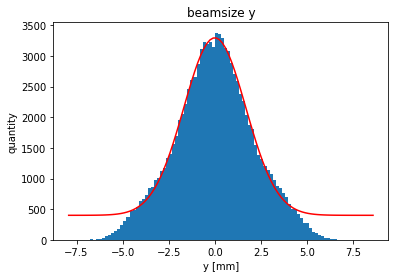

In [9]:
#Fitting of the histogram

#number of points in each bin
numberInBin_y = np.histogram(DataFrame['y [mm]'], bins = 100)
numberInBin2_y = numberInBin_y[0]

#duplicate numbers 10 times to become the same amount of values as for the x sizes
numberInBin3_y0 =np.repeat(numberInBin2_y[0], numberInBin2_y[0])
numberInBin3_y0 = numberInBin3_y0.astype('int')
numberInBin3_y1 =np.repeat(numberInBin2_y[1], numberInBin2_y[1])
numberInBin3_y1 = numberInBin3_y1.astype('int')
numberInBin3_y2 =np.repeat(numberInBin2_y[2], numberInBin2_y[2])
numberInBin3_y2 = numberInBin3_y2.astype('int')
numberInBin3_y3 =np.repeat(numberInBin2_y[3], numberInBin2_y[3])
numberInBin3_y3 = numberInBin3_y3.astype('int')
numberInBin3_y4 =np.repeat(numberInBin2_y[4], numberInBin2_y[4])
numberInBin3_y4 = numberInBin3_y4.astype('int')
numberInBin3_y5 =np.repeat(numberInBin2_y[5], numberInBin2_y[5])
numberInBin3_y5 = numberInBin3_y5.astype('int')
numberInBin3_y6 =np.repeat(numberInBin2_y[6], numberInBin2_y[6])
numberInBin3_y6 = numberInBin3_y6.astype('int')
numberInBin3_y7 =np.repeat(numberInBin2_y[7], numberInBin2_y[7])
numberInBin3_y7 = numberInBin3_y7.astype('int')
numberInBin3_y8 =np.repeat(numberInBin2_y[8], numberInBin2_y[8])
numberInBin3_y8 = numberInBin3_y8.astype('int')
numberInBin3_y9 =np.repeat(numberInBin2_y[9], numberInBin2_y[9])
numberInBin3_y9 = numberInBin3_y9.astype('int')
numberInBin3_y10 =np.repeat(numberInBin2_y[10], numberInBin2_y[10])
numberInBin3_y10 = numberInBin3_y10.astype('int')
numberInBin3_y11 =np.repeat(numberInBin2_y[11], numberInBin2_y[11])
numberInBin3_y11 = numberInBin3_y11.astype('int')
numberInBin3_y12 =np.repeat(numberInBin2_y[12], numberInBin2_y[12])
numberInBin3_y12 = numberInBin3_y12.astype('int')
numberInBin3_y13 =np.repeat(numberInBin2_y[13], numberInBin2_y[13])
numberInBin3_y13 = numberInBin3_y13.astype('int')
numberInBin3_y14 =np.repeat(numberInBin2_y[14], numberInBin2_y[14])
numberInBin3_y14 = numberInBin3_y14.astype('int')
numberInBin3_y15 =np.repeat(numberInBin2_y[15], numberInBin2_y[15])
numberInBin3_y15 = numberInBin3_y15.astype('int')
numberInBin3_y16 =np.repeat(numberInBin2_y[16], numberInBin2_y[16])
numberInBin3_y16 = numberInBin3_y16.astype('int')
numberInBin3_y17 =np.repeat(numberInBin2_y[17], numberInBin2_y[17])
numberInBin3_y17 = numberInBin3_y17.astype('int')
numberInBin3_y18 =np.repeat(numberInBin2_y[18], numberInBin2_y[18])
numberInBin3_y18 = numberInBin3_y18.astype('int')
numberInBin3_y19 =np.repeat(numberInBin2_y[19], numberInBin2_y[19])
numberInBin3_y19 = numberInBin3_y19.astype('int')
numberInBin3_y20 =np.repeat(numberInBin2_y[20], numberInBin2_y[20])
numberInBin3_y20 = numberInBin3_y20.astype('int')
numberInBin3_y21 =np.repeat(numberInBin2_y[21], numberInBin2_y[21])
numberInBin3_y21 = numberInBin3_y21.astype('int')
numberInBin3_y22 =np.repeat(numberInBin2_y[22], numberInBin2_y[22])
numberInBin3_y22 = numberInBin3_y22.astype('int')
numberInBin3_y23 =np.repeat(numberInBin2_y[23], numberInBin2_y[23])
numberInBin3_y23 = numberInBin3_y23.astype('int')
numberInBin3_y24 =np.repeat(numberInBin2_y[24], numberInBin2_y[24])
numberInBin3_y24 = numberInBin3_y24.astype('int')
numberInBin3_y25 =np.repeat(numberInBin2_y[25], numberInBin2_y[25])
numberInBin3_y25 = numberInBin3_y25.astype('int')
numberInBin3_y26 =np.repeat(numberInBin2_y[26], numberInBin2_y[26])
numberInBin3_y26 = numberInBin3_y26.astype('int')
numberInBin3_y27 =np.repeat(numberInBin2_y[27], numberInBin2_y[27])
numberInBin3_y27 = numberInBin3_y27.astype('int')
numberInBin3_y28 =np.repeat(numberInBin2_y[28], numberInBin2_y[28])
numberInBin3_y28 = numberInBin3_y28.astype('int')
numberInBin3_y29 =np.repeat(numberInBin2_y[29], numberInBin2_y[29])
numberInBin3_y29 = numberInBin3_y29.astype('int')
numberInBin3_y30 =np.repeat(numberInBin2_y[30], numberInBin2_y[30])
numberInBin3_y30 = numberInBin3_y30.astype('int')
numberInBin3_y31 =np.repeat(numberInBin2_y[31], numberInBin2_y[31])
numberInBin3_y31 = numberInBin3_y31.astype('int')
numberInBin3_y32 =np.repeat(numberInBin2_y[32], numberInBin2_y[32])
numberInBin3_y32 = numberInBin3_y32.astype('int')
numberInBin3_y33 =np.repeat(numberInBin2_y[33], numberInBin2_y[33])
numberInBin3_y33 = numberInBin3_y33.astype('int')
numberInBin3_y34 =np.repeat(numberInBin2_y[34], numberInBin2_y[34])
numberInBin3_y34 = numberInBin3_y34.astype('int')
numberInBin3_y35 =np.repeat(numberInBin2_y[35], numberInBin2_y[35])
numberInBin3_y35 = numberInBin3_y35.astype('int')
numberInBin3_y36 =np.repeat(numberInBin2_y[36], numberInBin2_y[36])
numberInBin3_y36 = numberInBin3_y36.astype('int')
numberInBin3_y37 =np.repeat(numberInBin2_y[37], numberInBin2_y[37])
numberInBin3_y37 = numberInBin3_y37.astype('int')
numberInBin3_y38 =np.repeat(numberInBin2_y[38], numberInBin2_y[38])
numberInBin3_y38 = numberInBin3_y38.astype('int')
numberInBin3_y39 =np.repeat(numberInBin2_y[39], numberInBin2_y[39])
numberInBin3_y39 = numberInBin3_y39.astype('int')
numberInBin3_y40 =np.repeat(numberInBin2_y[40], numberInBin2_y[40])
numberInBin3_y40 = numberInBin3_y40.astype('int')
numberInBin3_y41 =np.repeat(numberInBin2_y[41], numberInBin2_y[41])
numberInBin3_y41 = numberInBin3_y41.astype('int')
numberInBin3_y42 =np.repeat(numberInBin2_y[42], numberInBin2_y[42])
numberInBin3_y42 = numberInBin3_y42.astype('int')
numberInBin3_y43 =np.repeat(numberInBin2_y[43], numberInBin2_y[43])
numberInBin3_y43 = numberInBin3_y43.astype('int')
numberInBin3_y44 =np.repeat(numberInBin2_y[44], numberInBin2_y[44])
numberInBin3_y44 = numberInBin3_y44.astype('int')
numberInBin3_y45 =np.repeat(numberInBin2_y[45], numberInBin2_y[45])
numberInBin3_y45 = numberInBin3_y45.astype('int')
numberInBin3_y46 =np.repeat(numberInBin2_y[46], numberInBin2_y[46])
numberInBin3_y46 = numberInBin3_y46.astype('int')
numberInBin3_y47 =np.repeat(numberInBin2_y[47], numberInBin2_y[47])
numberInBin3_y47 = numberInBin3_y47.astype('int')
numberInBin3_y48 =np.repeat(numberInBin2_y[48], numberInBin2_y[48])
numberInBin3_y48 = numberInBin3_y48.astype('int')
numberInBin3_y49 =np.repeat(numberInBin2_y[49], numberInBin2_y[49])
numberInBin3_y49 = numberInBin3_y49.astype('int')
numberInBin3_y50 =np.repeat(numberInBin2_y[50], numberInBin2_y[50])
numberInBin3_y50 = numberInBin3_y50.astype('int')
numberInBin3_y51 =np.repeat(numberInBin2_y[51], numberInBin2_y[51])
numberInBin3_y51 = numberInBin3_y51.astype('int')
numberInBin3_y52 =np.repeat(numberInBin2_y[52], numberInBin2_y[52])
numberInBin3_y52 = numberInBin3_y52.astype('int')
numberInBin3_y53 =np.repeat(numberInBin2_y[53], numberInBin2_y[53])
numberInBin3_y53 = numberInBin3_y53.astype('int')
numberInBin3_y54 =np.repeat(numberInBin2_y[54], numberInBin2_y[54])
numberInBin3_y54 = numberInBin3_y54.astype('int')
numberInBin3_y55 =np.repeat(numberInBin2_y[55], numberInBin2_y[55])
numberInBin3_y55 = numberInBin3_y55.astype('int')
numberInBin3_y56 =np.repeat(numberInBin2_y[56], numberInBin2_y[56])
numberInBin3_y56 = numberInBin3_y56.astype('int')
numberInBin3_y57 =np.repeat(numberInBin2_y[57], numberInBin2_y[57])
numberInBin3_y57 = numberInBin3_y57.astype('int')
numberInBin3_y58 =np.repeat(numberInBin2_y[58], numberInBin2_y[58])
numberInBin3_y58 = numberInBin3_y58.astype('int')
numberInBin3_y59 =np.repeat(numberInBin2_y[59], numberInBin2_y[59])
numberInBin3_y59 = numberInBin3_y59.astype('int')
numberInBin3_y60 =np.repeat(numberInBin2_y[60], numberInBin2_y[60])
numberInBin3_y60 = numberInBin3_y60.astype('int')
numberInBin3_y61 =np.repeat(numberInBin2_y[61], numberInBin2_y[61])
numberInBin3_y61 = numberInBin3_y61.astype('int')
numberInBin3_y62 =np.repeat(numberInBin2_y[62], numberInBin2_y[62])
numberInBin3_y62 = numberInBin3_y62.astype('int')
numberInBin3_y63 =np.repeat(numberInBin2_y[63], numberInBin2_y[63])
numberInBin3_y63 = numberInBin3_y63.astype('int')
numberInBin3_y64 =np.repeat(numberInBin2_y[64], numberInBin2_y[64])
numberInBin3_y64 = numberInBin3_y64.astype('int')
numberInBin3_y65 =np.repeat(numberInBin2_y[65], numberInBin2_y[65])
numberInBin3_y65 = numberInBin3_y65.astype('int')
numberInBin3_y66 =np.repeat(numberInBin2_y[66], numberInBin2_y[66])
numberInBin3_y66 = numberInBin3_y66.astype('int')
numberInBin3_y67 =np.repeat(numberInBin2_y[67], numberInBin2_y[67])
numberInBin3_y67 = numberInBin3_y67.astype('int')
numberInBin3_y68 =np.repeat(numberInBin2_y[68], numberInBin2_y[68])
numberInBin3_y68 = numberInBin3_y68.astype('int')
numberInBin3_y69 =np.repeat(numberInBin2_y[69], numberInBin2_y[69])
numberInBin3_y69 = numberInBin3_y69.astype('int')
numberInBin3_y70 =np.repeat(numberInBin2_y[70], numberInBin2_y[70])
numberInBin3_y70 = numberInBin3_y70.astype('int')
numberInBin3_y71 =np.repeat(numberInBin2_y[71], numberInBin2_y[71])
numberInBin3_y71 = numberInBin3_y71.astype('int')
numberInBin3_y72 =np.repeat(numberInBin2_y[72], numberInBin2_y[72])
numberInBin3_y72 = numberInBin3_y72.astype('int')
numberInBin3_y73 =np.repeat(numberInBin2_y[73], numberInBin2_y[73])
numberInBin3_y73 = numberInBin3_y73.astype('int')
numberInBin3_y74 =np.repeat(numberInBin2_y[74], numberInBin2_y[74])
numberInBin3_y74 = numberInBin3_y74.astype('int')
numberInBin3_y75 =np.repeat(numberInBin2_y[75], numberInBin2_y[75])
numberInBin3_y75 = numberInBin3_y75.astype('int')
numberInBin3_y76 =np.repeat(numberInBin2_y[76], numberInBin2_y[76])
numberInBin3_y76 = numberInBin3_y76.astype('int')
numberInBin3_y77 =np.repeat(numberInBin2_y[77], numberInBin2_y[77])
numberInBin3_y77 = numberInBin3_y77.astype('int')
numberInBin3_y78 =np.repeat(numberInBin2_y[78], numberInBin2_y[78])
numberInBin3_y78 = numberInBin3_y78.astype('int')
numberInBin3_y79 =np.repeat(numberInBin2_y[79], numberInBin2_y[79])
numberInBin3_y79 = numberInBin3_y79.astype('int')
numberInBin3_y80 =np.repeat(numberInBin2_y[80], numberInBin2_y[80])
numberInBin3_y80 = numberInBin3_y80.astype('int')
numberInBin3_y81 =np.repeat(numberInBin2_y[81], numberInBin2_y[81])
numberInBin3_y81 = numberInBin3_y81.astype('int')
numberInBin3_y82 =np.repeat(numberInBin2_y[82], numberInBin2_y[82])
numberInBin3_y82 = numberInBin3_y82.astype('int')
numberInBin3_y83 =np.repeat(numberInBin2_y[83], numberInBin2_y[83])
numberInBin3_y83 = numberInBin3_y83.astype('int')
numberInBin3_y84 =np.repeat(numberInBin2_y[84], numberInBin2_y[84])
numberInBin3_y84 = numberInBin3_y84.astype('int')
numberInBin3_y85 =np.repeat(numberInBin2_y[85], numberInBin2_y[85])
numberInBin3_y85 = numberInBin3_y85.astype('int')
numberInBin3_y86 =np.repeat(numberInBin2_y[86], numberInBin2_y[86])
numberInBin3_y86 = numberInBin3_y86.astype('int')
numberInBin3_y87 =np.repeat(numberInBin2_y[87], numberInBin2_y[87])
numberInBin3_y87 = numberInBin3_y87.astype('int')
numberInBin3_y88 =np.repeat(numberInBin2_y[88], numberInBin2_y[88])
numberInBin3_y88 = numberInBin3_y88.astype('int')
numberInBin3_y89 =np.repeat(numberInBin2_y[89], numberInBin2_y[89])
numberInBin3_y89 = numberInBin3_y89.astype('int')
numberInBin3_y90 =np.repeat(numberInBin2_y[90], numberInBin2_y[90])
numberInBin3_y90 = numberInBin3_y90.astype('int')
numberInBin3_y91 =np.repeat(numberInBin2_y[91], numberInBin2_y[91])
numberInBin3_y91 = numberInBin3_y91.astype('int')
numberInBin3_y92 =np.repeat(numberInBin2_y[92], numberInBin2_y[92])
numberInBin3_y92 = numberInBin3_y92.astype('int')
numberInBin3_y93 =np.repeat(numberInBin2_y[93], numberInBin2_y[93])
numberInBin3_y93 = numberInBin3_y93.astype('int')
numberInBin3_y94 =np.repeat(numberInBin2_y[94], numberInBin2_y[94])
numberInBin3_y94 = numberInBin3_y94.astype('int')
numberInBin3_y95 =np.repeat(numberInBin2_y[95], numberInBin2_y[95])
numberInBin3_y95 = numberInBin3_y95.astype('int')
numberInBin3_y96 =np.repeat(numberInBin2_y[96], numberInBin2_y[96])
numberInBin3_y96 = numberInBin3_y96.astype('int')
numberInBin3_y97 =np.repeat(numberInBin2_y[97], numberInBin2_y[97])
numberInBin3_y97 = numberInBin3_y97.astype('int')
numberInBin3_y98 =np.repeat(numberInBin2_y[98], numberInBin2_y[98])
numberInBin3_y98 = numberInBin3_y98.astype('int')
numberInBin3_y99 =np.repeat(numberInBin2_y[99], numberInBin2_y[99])
numberInBin3_y99 = numberInBin3_y99.astype('int')
numberInBin3_y = np.concatenate([numberInBin3_y0, numberInBin3_y1, numberInBin3_y2, numberInBin3_y3, numberInBin3_y4 ,numberInBin3_y5 ,numberInBin3_y6 ,numberInBin3_y7 , numberInBin3_y8 ,numberInBin3_y9,numberInBin3_y10, numberInBin3_y11, numberInBin3_y12, numberInBin3_y13, numberInBin3_y14 ,numberInBin3_y15 ,numberInBin3_y16 ,numberInBin3_y17 , numberInBin3_y18 ,numberInBin3_y19,numberInBin3_y20, numberInBin3_y21, numberInBin3_y22, numberInBin3_y23, numberInBin3_y24 ,numberInBin3_y25 ,numberInBin3_y26 ,numberInBin3_y27 , numberInBin3_y28 ,numberInBin3_y29, numberInBin3_y30, numberInBin3_y31, numberInBin3_y32, numberInBin3_y33, numberInBin3_y34 ,numberInBin3_y35 ,numberInBin3_y36 ,numberInBin3_y37 , numberInBin3_y38 ,numberInBin3_y39,numberInBin3_y40, numberInBin3_y41, numberInBin3_y42, numberInBin3_y43, numberInBin3_y44 ,numberInBin3_y45 ,numberInBin3_y46 ,numberInBin3_y47 , numberInBin3_y48 ,numberInBin3_y49, numberInBin3_y50, numberInBin3_y51, numberInBin3_y52, numberInBin3_y53, numberInBin3_y54 ,numberInBin3_y55 ,numberInBin3_y56 ,numberInBin3_y57 , numberInBin3_y58 ,numberInBin3_y59,numberInBin3_y60, numberInBin3_y61, numberInBin3_y62, numberInBin3_y63, numberInBin3_y64 ,numberInBin3_y65 ,numberInBin3_y66 ,numberInBin3_y67 , numberInBin3_y68 ,numberInBin3_y69, numberInBin3_y70, numberInBin3_y71, numberInBin3_y72, numberInBin3_y73, numberInBin3_y74 ,numberInBin3_y75 ,numberInBin3_y76 ,numberInBin3_y77 , numberInBin3_y78 ,numberInBin3_y79, numberInBin3_y80, numberInBin3_y81, numberInBin3_y82, numberInBin3_y83, numberInBin3_y84 ,numberInBin3_y85 ,numberInBin3_y86 ,numberInBin3_y87 , numberInBin3_y88 ,numberInBin3_y89,numberInBin3_y90, numberInBin3_y91, numberInBin3_y92, numberInBin3_y93, numberInBin3_y94 ,numberInBin3_y95 ,numberInBin3_y96 ,numberInBin3_y97 , numberInBin3_y98 ,numberInBin3_y99])
numberInBin3_y

#actual fit
priors_y = [1, 0, 2, 1]
popt_y, pcov_y = curve_fit(FitFunction,np.sort(DataFrame['y [mm]']), numberInBin3_y, priors_y, maxfev=10000)

#definition og sigma2_x
sigma_y = popt_y[2]
sigma2_y = sigma_y *2

#define points for a smoth fit line
yspace = np.linspace(np.amin(DataFrame['y [mm]']), np.amax(DataFrame['y [mm]']), 100)

#limitation of the plot area (only where quantitiy>0)
#search for y-transition from negative to positive, to plot only positive curve
posCurve = np.where(FitFunction(yspace, *popt_y)>0)
yspace2 = np.linspace(yspace[posCurve[0][0]], yspace[posCurve[0][len(posCurve[0])-1]], 100)

# plot of the beamsize x
plt.figure(2) 
plt.hist(DataFrame['y [mm]'], bins = 100)  
plt.plot(yspace2,FitFunction(yspace2, *popt_y),'r-')
plt.title('beamsize y') 
plt.xlabel('y [mm]') 
plt.ylabel('quantity') 
plt.show()

In [10]:
values = [DataFrame['z [mm]'][1]]
values.append(sigma2_x)
values.append(sigma2_y)
#values.append(math.sqrt(pcov_x[2][2])*2)
#values.append(math.sqrt(pcov_y[2][2])*2)
values

[8097.4,
 -8.740028843695635,
 -3.362127078645669,
 0.005498413646116502,
 0.0015159064051678756]

In [11]:
with open(r"C:\Users\Stefan\Documents\Masterarbeit\G4Beamline\BL1U\Results.txt", "ab") as f:
    f.write(b"\n")
    np.savetxt(f, values, fmt='%1.3f', newline=' ')